In [2]:
#import libraries#

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
#Create large synthetic dataset for clustering. Normally this would be a df of actual patient data, but 
#to protect patient data, we will use a synthetic dataset containing datapoints for renal panels
n_records = 100000
n_columns = 7
np.random.seed(42)
sodium = np.random.normal(loc=135, scale=5, size=n_records)
potassium = np.random.normal(loc=4, scale=0.5, size=n_records)
chloride = np.random.normal(loc=100, scale=5, size=n_records)
bicarbonate = np.random.normal(loc=24, scale=2, size=n_records)
bun = np.random.normal(loc=15, scale=5, size=n_records)
creatinine = np.random.normal(loc=1, scale=0.2, size=n_records)
glucose = np.random.normal(loc=100, scale=10, size=n_records)


# create dictionary of arrays
data = {
    'sodium': sodium, 
    'potassium': potassium, 
    'chloride': chloride,
    'bicarbonate' : bicarbonate,
    'bun' : bun,
    'creatinine' : creatinine, 
    'glucose': glucose
    }

# create DataFrame
renal_data = pd.DataFrame(data)

In [9]:

X = renal_data[['sodium', 'potassium', 'chloride', 'bicarbonate', 'bun', 'creatinine', 'glucose']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

label_map = {0: 'not at risk', 1: 'at risk', 2: 'escalated'}
clusters = kmeans.predict(X_scaled)
cluster_labels = pd.Series(clusters).map(label_map)
renal_data['cluster'] = cluster_labels

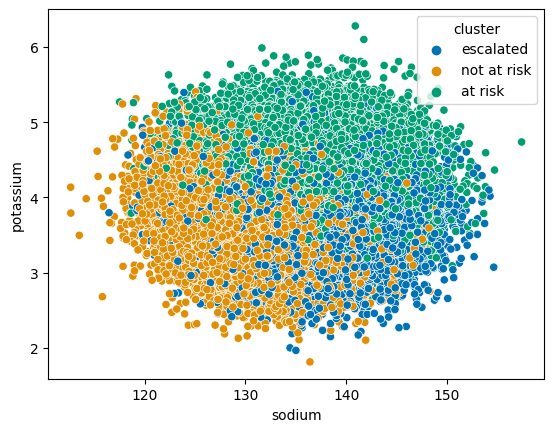

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=renal_data, x='sodium', y='potassium', hue='cluster', palette='colorblind')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6d1726b5-b54c-4c95-85b8-d39a7c228df1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>